# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Matthieu Pilon - PILM17089003, Alexis Lemelin - LEMA14109400, Robin St-Georges -  STGR09069203                                 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | A18                                            |
| Groupe                | 2                                                       |
| Numéro du laboratoire | 2                                                       |
| Professeur            | Hervé Lombaert                                                |
| Chargé de laboratoire | Pier-Luc Delisle                                                      |
| Date                  | 30 octobre 2018                                                    |

In [1]:
import numpy as np
from custom.lab02.matrix import Matrix
from custom.lab02.classificateurs import Bayes, KNN, DecisionTree, Class, CrossValidation

In [2]:
galaxy = Matrix("data/csv/galaxy/galaxy_feature_vectors.csv")
spam = Matrix("data/csv/spam/spam.csv")

galaxy.ParseFile()
spam.ParseFile()

galax = galaxy.getPrimitive(4,6,7,8,20,21,40,41,46,48,49,51,53,75)
spamWord = spam.getPrimitive()

galax = galaxy.FloatArray(galax)

train, valid  = spam.CreateTestSet(spamWord, 20)
gtrain, gvalid = galaxy.CreateTestSet(galax, 20)

In [3]:
### Spam

X = []
Y = []
trainX = []
trainY = []

for line in valid:
    X.append(line[:-1])
    Y.append(line[-1])
    
for line in train:
    trainX.append(line[:-1])
    trainY.append(line[-1])
    
X = np.array(X)
Y = np.array(Y)

clf = Bayes()
y_gnb = clf.GaussNB(X, Y, trainX)
y_mnb = clf.Multinomial(X, Y, trainX)
y_mms = clf.MinMaxNB(X, Y, trainX)
y_kbd = clf.DiscretNonSupp(X, Y, trainX)

clf = KNN()
y_uni3 = clf.Uniform(X, Y, trainX, 3)
y_uni5 = clf.Uniform(X, Y, trainX, 5)
y_uni10 = clf.Uniform(X, Y, trainX, 10)

y_dst3 = clf.Distance(X, Y, trainX, 3)
y_dst5 = clf.Distance(X, Y, trainX, 5)
y_dst10 = clf.Distance(X, Y, trainX, 10)

clf = DecisionTree()
mdn = clf.DepthNone(X, Y, trainX)
md3 = clf.DepthK(X, Y, trainX, 3)
md5 = clf.DepthK(X, Y, trainX, 5)
md10 = clf.DepthK(X, Y, trainX, 10)

asgnb, f1gnb = spam.PrintMetricsScore(trainY, y_gnb, "Gaussian")
asmnb, f1mnb = spam.PrintMetricsScore(trainY, y_mnb, "Multinomial")
asmms, f1mms = spam.PrintMetricsScore(trainY, y_mms, "MinMax Scaler")
askbd, f1kbd = spam.PrintMetricsScore(trainY, y_kbd, "Non-Superviser")

asu3, f1u3   = spam.PrintMetricsScore(trainY, y_uni3, "Uniforme 3")
asu5, f1u5   = spam.PrintMetricsScore(trainY, y_uni5, "Uniforme 5")
asu10, f1u10 = spam.PrintMetricsScore(trainY, y_uni10, "Uniforme 10")
asd3, f1d3   = spam.PrintMetricsScore(trainY, y_dst3, "Distance 3")
asd5, f1d5   = spam.PrintMetricsScore(trainY, y_dst5, "Distance 5")
asd10, f1d10 = spam.PrintMetricsScore(trainY, y_dst10, "Distance 10")

as0 , f10   = spam.PrintMetricsScore(trainY, mdn, "Depth None")
as3 , f13   = spam.PrintMetricsScore(trainY, md3, "Depth 3")
as5 , f15   = spam.PrintMetricsScore(trainY, md5, "Depth 5")
as10 , f110 = spam.PrintMetricsScore(trainY, md10, "Depth 10")

Gaussian scores: Accuracy: 0.7789855072463768 ; F1: 0.7870850122471204
Multinomial scores: Accuracy: 0.8134057971014492 ; F1: 0.815664631641409
MinMax Scaler scores: Accuracy: 0.907608695652174 ; F1: 0.9088421459962962
Non-Superviser scores: Accuracy: 0.6159420289855072 ; F1: 0.6154126415623827
Uniforme 3 scores: Accuracy: 0.8677536231884058 ; F1: 0.869834037317907
Uniforme 5 scores: Accuracy: 0.8460144927536232 ; F1: 0.8480702433271602
Uniforme 10 scores: Accuracy: 0.822463768115942 ; F1: 0.8206350972712658
Distance 3 scores: Accuracy: 0.9365942028985508 ; F1: 0.9375173110054608
Distance 5 scores: Accuracy: 0.9601449275362319 ; F1: 0.9604421518054532
Distance 10 scores: Accuracy: 0.9528985507246377 ; F1: 0.9533775580794381
Depth None scores: Accuracy: 0.9782608695652174 ; F1: 0.9784229918938835
Depth 3 scores: Accuracy: 0.8677536231884058 ; F1: 0.8672105326248323
Depth 5 scores: Accuracy: 0.9202898550724637 ; F1: 0.9200296371678651
Depth 10 scores: Accuracy: 0.9528985507246377 ; F1: 0

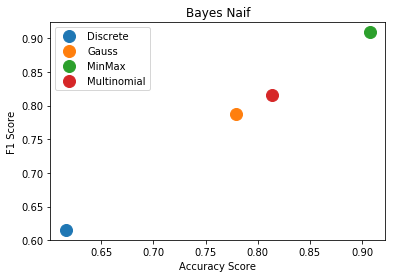

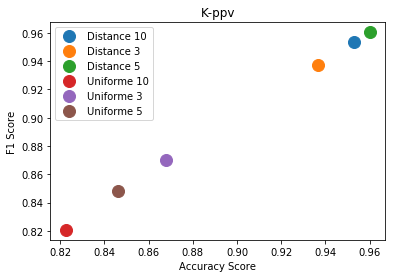

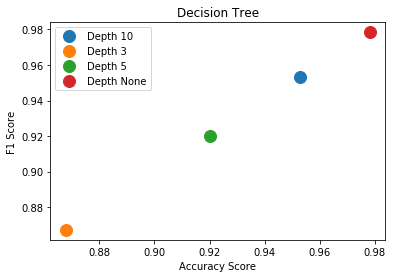

In [4]:
#Calcule de Metrics
accuracy_score = np.array((asgnb, asmnb, asmms, askbd))
f1_score = np.array([f1gnb,f1mnb,f1mms,f1kbd])

knn_acc = np.array((asu3, asu5, asu10, asd3, asd5, asd10))
knn_f1  = np.array((f1u3, f1u5, f1u10, f1d3, f1d5, f1d10))

dt_acc = np.array((as0, as3, as5, as10))
dt_f1  = np.array((f10, f13, f15, f110))

spam.PrintPlot(accuracy_score, f1_score, ['Gauss', 'Multinomial', 'MinMax', 'Discrete'], "Bayes Naif")
spam.PrintPlot(knn_acc, knn_f1, ['Uniforme 3','Uniforme 5','Uniforme 10', 'Distance 3', 'Distance 5', 'Distance 10'], "K-ppv")
spam.PrintPlot(dt_acc, dt_f1, ['Depth None', 'Depth 3', 'Depth 5', 'Depth 10'], "Decision Tree")

In [8]:
### Cross Validation
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pands as pd

mms = MinMaxScaler()
Xmms = mms.fit_transform(X)

bayes = Class().Multi()
cv = CrossValidation()

cv.AccuracyScore(bayes, Xmms, Y)
cv.F1Score(bayes, Xmms, Y)




0.7247885251920156

In [7]:
### Galaxy

X = []
Y = []
trainX = []
trainY = []

for line in gvalid:
    X.append(line[:-1])
    Y.append(line[-1])
    
for line in gtrain:
    trainX.append(line[:-1])
    trainY.append(line[-1])

X = np.array(X)    
Y = np.array(Y)
    
clf = Bayes()
y_gnb = clf.GaussNB(X, Y, trainX)
y_mnb = clf.Multinomial(X, Y, trainX)
y_mms = clf.MinMaxNB(X, Y, trainX)
y_kbd = clf.DiscretNonSupp(X, Y, trainX)

clf = KNN()
y_uni3 = clf.Uniform(X, Y, trainX, 3)
y_uni5 = clf.Uniform(X, Y, trainX, 5)
y_uni10 = clf.Uniform(X, Y, trainX, 10)

y_dst3 = clf.Distance(X, Y, trainX, 3)
y_dst5 = clf.Distance(X, Y, trainX, 5)
y_dst10 = clf.Distance(X, Y, trainX, 10)

clf = DecisionTree()
mdn = clf.DepthNone(X, Y, trainX)
md3 = clf.DepthK(X, Y, trainX, 3)
md5 = clf.DepthK(X, Y, trainX, 5)
md10 = clf.DepthK(X, Y, trainX, 10)

asgnb, f1gnb = galaxy.PrintMetricsScore(trainY, y_gnb, "Gaussian")
asmnb, f1mnb = galaxy.PrintMetricsScore(trainY, y_mnb, "Multinomial")
asmms, f1mms = galaxy.PrintMetricsScore(trainY, y_mms, "MinMax Scaler")
askbd, f1kbd = galaxy.PrintMetricsScore(trainY, y_kbd, "Non-Superviser")

asu3, f1u3   = galaxy.PrintMetricsScore(trainY, y_uni3, "Uniforme 3")
asu5, f1u5   = galaxy.PrintMetricsScore(trainY, y_uni5, "Uniforme 5")
asu10, f1u10 = galaxy.PrintMetricsScore(trainY, y_uni10, "Uniforme 10")
asd3, f1d3   = galaxy.PrintMetricsScore(trainY, y_dst3, "Distance 3")
asd5, f1d5   = galaxy.PrintMetricsScore(trainY, y_dst5, "Distance 5")
asd10, f1d10 = galaxy.PrintMetricsScore(trainY, y_dst10, "Distance 10")

as0 , f10   = galaxy.PrintMetricsScore(trainY, mdn, "Depth None")
as3 , f13   = galaxy.PrintMetricsScore(trainY, md3, "Depth 3")
as5 , f15   = galaxy.PrintMetricsScore(trainY, md5, "Depth 5")
as10 , f110 = galaxy.PrintMetricsScore(trainY, md10, "Depth 10")

ValueError: Input X must be non-negative

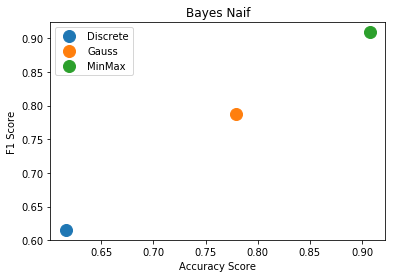

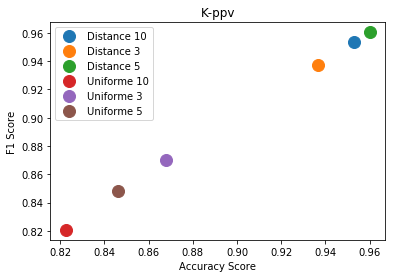

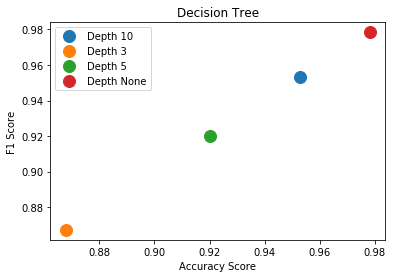

In [6]:
#Calcule de Metrics
accuracy_score = np.array((asgnb,  asmms, askbd))
f1_score = np.array([f1gnb,f1mms,f1kbd])

knn_acc = np.array((asu3, asu5, asu10, asd3, asd5, asd10))
knn_f1 = np.array((f1u3, f1u5, f1u10, f1d3, f1d5, f1d10))

dt_acc = np.array((as0, as3, as5, as10))
dt_f1  = np.array((f10, f13, f15, f110))

galaxy.PrintPlot(accuracy_score, f1_score, ['Gauss', 'MinMax', 'Discrete'], "Bayes Naif")
galaxy.PrintPlot(knn_acc, knn_f1, ['Uniforme 3','Uniforme 5','Uniforme 10', 'Distance 3', 'Distance 5', 'Distance 10'], "K-ppv")
galaxy.PrintPlot(dt_acc, dt_f1, ['Depth None', 'Depth 3', 'Depth 5', 'Depth 10'], "Decision Tree")

## Introduction

## Question 1
### Méthode de création des ensembles de données

L’approche prise pour créer les datasets pour les galaxies et les courriels étaient différentes pour les deux. Pour le dataset des galaxy, il a fallu extraire certaines primitives du fichier vecteurs correspondant aux primitives évaluer lors du premier laboratoire sur les images de galaxy. Sur une entré ayant 58 primitives, réduire le nombre était essentiel. Avec les arrays de la classe numpy, l’extraction des primitives sélectionnées était facile. L’ensemble globale a été réduite de 76 à 14 primitives. À la fin de l’extraction, les 10000+ entrés ont été mises en mémoire. Pour les pourriels, aucune modification est amenée aux primitives. Donc, le tout  fut conservé dans la mémoire. 

Pour construire les donnés de train et de validation, mélanger les matrices avec random était simple. En calculant un ratio de 20% sur la totalité de l’ensemble, la séparation était, encore, simple. Avec les commandes de python, séparer une liste au milieu était simple en utilisant l’index :k ou k:. 

L’approche dynamique de l’extraction fait en sorte d’avoir un nouveau dataset de train et de validation après chaque exécution du code.

## Question 1
### Détails des ensembles produits

## Question 2
### Approche de validation proposée et justification

Dans ce laboratoire, nous avons principalement utilisé deux méthodes de validation.(Holdout et k-fold cross-validation) 

Nous avons premièrement utilisé la méthode Holdout lors de nos entraînements initiaux pour obtenir des résultats rapides. Cette méthode est très simple. Elle consiste à séparer les données en un groupe de test et un groupe de validation et effectuer les tests sur ces deux groupes par la suite.

Ensuite,  nous avons utilisé la méthode k-fold cross-validation tel que demandé dans l’énoncé de laboratoire. Cette méthode consiste à séparer les données en un nombre spécifique de groupes.(ici 10) Une fois les données séparées, on effectue les calculs en utilisant un des groupes comme groupe de validation et tous les autres comme ensemble de test. Puis, l’on effectue la même action en utilisant chacun des autres groupes comme ensemble de validation. Finalement, il ne reste plus qu'à calculer les résultats moyens des résultats obtenus.

Après comparaison, il semble que k-fold cross-validation soit en effet plus précis. Cependant, celui-ci prend énormément plus de temps à “processer” que Holdout.


## Question 3
### Matrice des expérimentations

Pour Knn, les hyperparamètres(principalement k) affectent principalement la précision et le temps d'exécution du modèle. En effet, un k trop élevé/trop bas et le modèle commence à inclure beaucoup plus de données erronées dans l’un ou l’autre des groupes, car il commence à relier des points qui sont plus distants.

Pour les arbres de décision, l’hyperparamètre principal est la profondeur de l’arbre. Une profondeur plus élevée peut causer un sur entraînement et une pénurie de valeurs pour couvrir tous les cas possibles.(problème de dimensionnalité) Pour régler ce problème, il faut pruner certaines branches de l’arbre.

Pour bayes, c’est principalement le min max. Ce paramètre affecte principalement la précision, car s’il est trop acceptant, il induit des résultats qui ne seraient pas accepté auparavant. Même chose s’il est plus stricte.


## Question 3
### Étude des hyperparamètres et des modèles

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

## Question 6
### Discussion sur la nature des données

Techniquement, un ensemble de données peut se démarquer peut importe l’algorithme. Cela peut dépendre des données par elles même ou d’un algorithme peu discriminant/trop discriminant. Cependant, considérant que toutes les primitives ont été identifiées sur des images plutôt similaires ou dans un fichier de primitives fournies, il est plus probable que si des ensembles se démarque, cela est dû à notre code.

## Question 7
### Recommandations

## Question 8
### Améliorations possibles

Il existe plusieurs possibilités pour améliorer nos classificateurs. Par exemple, il aurait été possible d’utiliser un algorithme tous-sauf-un pour l'entraînement. Ceci aurait été beaucoup plus demandant, mais aurait ultimement augmenté grandement la précision de nos résultats. 

Une autre possibilité aurait été d'augmenter la grandeur de l’ensemble d’entraînement fourni à l’algorithme ou de simplement augmenter le nombre de données fournies.


## Conclusion

En conclusion, l’utilisation de différents algorithmes nous a permis de voir l’impact des hyperparamètres sur la précision de la prédiction. En effet, le plus de travail ne donne pas toujours le meilleur résultat. De plus, le temps de travail est parfois plus long par rapport au résultat obtenu. Nous avons aussi pu observé que certain model sont plus pertinent selon le format des primitives. La méthode de validation à aussi un impact sur la mesure de précision.

## Bibliographie